# Time to get your hands dirty: The HR diagram (...and the importance of data scaling in machine learning)
This assignment is about stars...

We will work with a star catalogue of 240 stars described by the following information:
- Temperature (in Kelvin)
- Luminosity (L/Lo)
- Radius (R/Ro)
- Absolute magnitude (Mv)

We also have the following data for each star:

- Color (Red/Orange/Yellow/White/Blue)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)


- Apply PCA to the dataset at your disposal *(hint: don't use columns with labels, only those with real numbers)*.
- Project the dataset into the principal components, and do a scatter plot of the first two.
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

**This is actually a very important lesson in machine learning:**  
Massaging your data before giving them to an algorithm can make things much much better.

- You can try a linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is the [usual machine-learning approach](https://scikit-learn.org/stable/modules/preprocessing.html)) standardize your data such that each dimension has mean = 0 and variance = 1.
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?

---

## For later: come back to this assignment after lecture 20

- Now run a supervised classification algorithm on this dataset.
- Can you predict the stellar type? How well? Careful with overfitting of course.


In [1]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x774c0abd41f0>)

In [3]:
df_stars = pd.read_csv("stars.csv")
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


In [5]:
print(df_stars.isna().any().any())   # Checks if there is at least one NaN (missing value) anywhere in the DataFrame

False


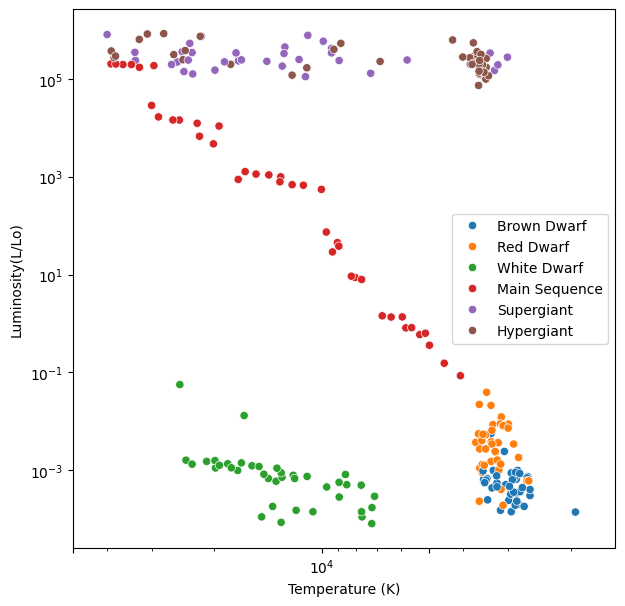

In [6]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

In [7]:
df_stars_reduced = df_stars.iloc[:, :-3] # Select all columns except the last 3
df_stars_reduced

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [ ]:
pca = PCA(n_components=2)
pca.fit(df_stars_reduced)  # Fit PCA on the original unscaled data


PCA(n_components=2)

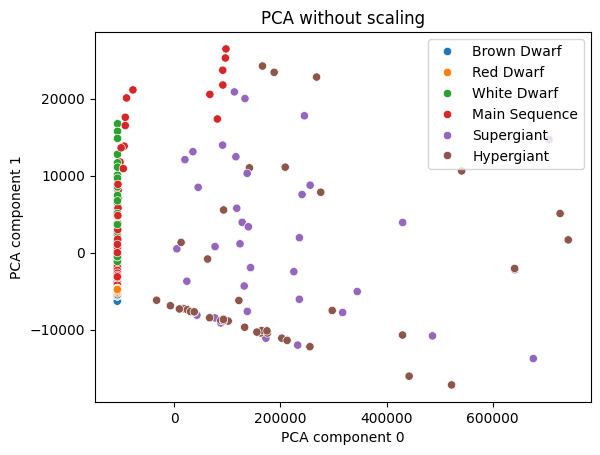

In [ ]:
pca_result = pca.transform(df_stars_reduced) # Project the original data onto the principal components

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels) #Scatter plot of the two principal components
plt.title("PCA without scaling")
plt.xlabel("PCA component 0")
plt.ylabel("PCA component 1")
plt.show()

In [ ]:
# Standardization ensures all variables contribute equally to PCA, preventing those with larger numerical scales from dominating.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_stars_reduced) # Each feature will now have mean = 0 and standard deviation = 1

pca_scaled = PCA()
pca_scaled.fit(df_scaled) 


PCA()

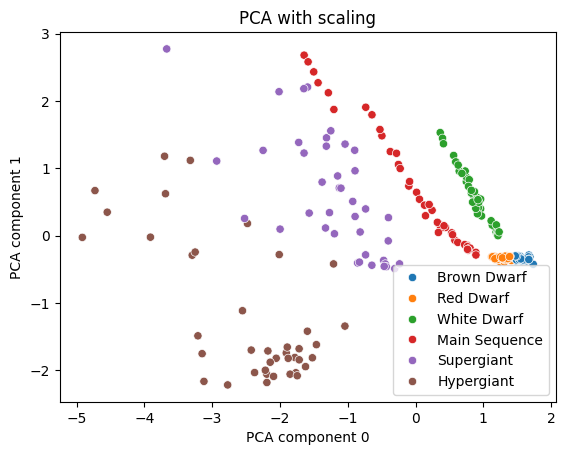

In [16]:
pca_resultscaled = pca_scaled.transform(df_scaled)
sns.scatterplot(x=pca_resultscaled[:, 0], y=pca_resultscaled[:, 1], hue=labels)
plt.title("PCA with scaling")
plt.xlabel("PCA component 0")
plt.ylabel("PCA component 1")
plt.show()

In [17]:
print("Explained variance:", pca_scaled.explained_variance_ratio_)

Explained variance: [0.60357391 0.23500784 0.09329645 0.0681218 ]


In [18]:
c=0
# Loop through the PCA components to print the explained variance and cumulative variance
for i,v in enumerate(pca_scaled.explained_variance_ratio_):
    c+=v
    print(f"The {i+1} componenet explains {100*v:.1f}% of the variance, so the comulative is {100*c:.1f}%")


The 1 componenet explains 60.4% of the variance, so the comulative is 60.4%
The 2 componenet explains 23.5% of the variance, so the comulative is 83.9%
The 3 componenet explains 9.3% of the variance, so the comulative is 93.2%
The 4 componenet explains 6.8% of the variance, so the comulative is 100.0%
